#*Sales prediction*

Problem statement we have sales data of petrol and electric two wheeler sales for the year 2019 -2023 with these data we need to predict the sales of 2024

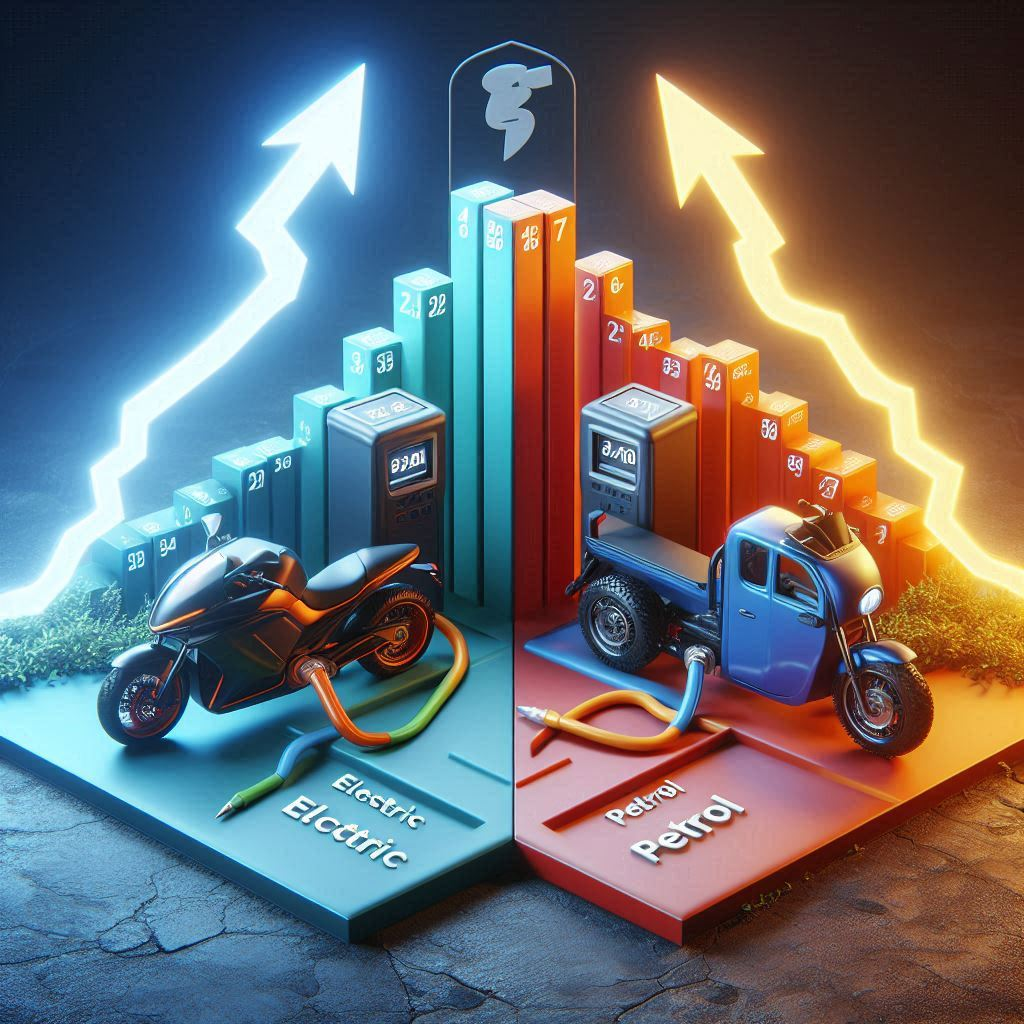

In [ ]:
from IPython.display import Image, display
filename = list(uploaded.keys())[0]
display(Image(filename=filename))


In [ ]:
#Installing the required Packages
!pip install pandas
!pip install snowflake-connector-python
!pip install snowflake-sqlalchemy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


#Connecting to snowflake and retrive the raw data that is being processed while data engineering work

In [ ]:


# Import Libraries
import pandas as pd
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

# Snowflake connection options
snowflake_options = {
    "account": "qzrclub-ns10189",
    "user": "RK966",
    "password": "1+1Rahul",
    "database": "RKKDB",
    "schema": "RKKSCHEMA",
    "role": "ACCOUNTADMIN",
    "warehouse": "COMPUTE_WH"
}

# Create Snowflake engine with detailed error handling
try:
    engine = create_engine(URL(
        account=snowflake_options["account"],
        user=snowflake_options["user"],
        password=snowflake_options["password"],
        database=snowflake_options["database"],
        schema=snowflake_options["schema"],
        role=snowflake_options["role"],
        warehouse=snowflake_options["warehouse"]
    ))

    # Test connection by querying a simple statement
    connection = engine.connect()
    print("Connection to Snowflake succeeded!")



except Exception as e:
    print(f"Failed to connect to Snowflake: {e}")


Connection to Snowflake succeeded!


In [ ]:
query = "SELECT * FROM totalsales"
df = pd.read_sql(query, engine)
df.head(25)


,sn0,month,year,maker,electricbov,petrol,total
0,1,JAN,2019,ACTION CONSTRUCTION EQUIPMENT LTD.,0,1,1
1,2,JAN,2019,ADISHWAR AUTO RIDE INDIA PVT LTD,0,8,8
2,3,JAN,2019,ATHER ENERGY PVT LTD,20,0,20
3,4,JAN,2019,ATUL AUTO LTD,0,1,1
4,5,JAN,2019,AVAN MOTORS PVT LTD,14,0,14
5,6,JAN,2019,BAJAJ AUTO LTD,0,"1,77,787","1,77,787"
6,7,JAN,2019,BAJAJ IMPLEMENTS PVT LTD,0,1,1
7,8,JAN,2019,BENTLEY MOTORS LTD,0,1,1
8,9,JAN,2019,BHAGAT AGRO INDUSTRIES,0,1,1
9,10,JAN,2019,BMW INDIA PVT LTD,0,264,264


In [ ]:
df.shape

(4468, 7)

In [ ]:
df.describe()

,sn0,year
count,4468.000000,4468.000000
mean,545.028648,2021.563563
std,415.351434,1.446374
min,1.000000,2019.000000
25%,224.000000,2020.000000
50%,447.000000,2022.000000
75%,776.000000,2023.000000
max,1665.000000,2023.000000


In [ ]:
df.isnull().sum()


sn0            0
month          0
year           0
maker          0
electricbov    0
petrol         0
total          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sn0          4468 non-null   int64 
 1   month        4468 non-null   object
 2   year         4468 non-null   int64 
 3   maker        4468 non-null   object
 4   electricbov  4468 non-null   object
 5   petrol       4468 non-null   object
 6   total        4468 non-null   object
dtypes: int64(2), object(5)
memory usage: 244.5+ KB


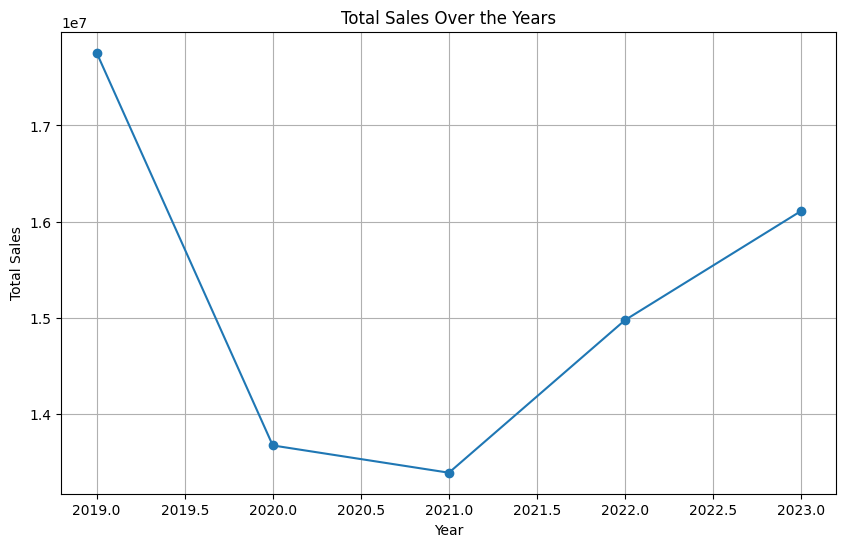

In [ ]:
import matplotlib.pyplot as plt

# Remove commas from numeric columns and convert to integers
df['electricbov'] = df['electricbov'].replace(',', '', regex=True).astype(int)
df['petrol'] = df['petrol'].replace(',', '', regex=True).astype(int)
df['total'] = df['total'].replace(',', '', regex=True).astype(int)

# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the total sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['total'], marker='o', linestyle='-')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# You can see there is a downfall of sales in the year 2020 satring to 2021 mid that is mainly due to covid 19 and after that the sales started increasing

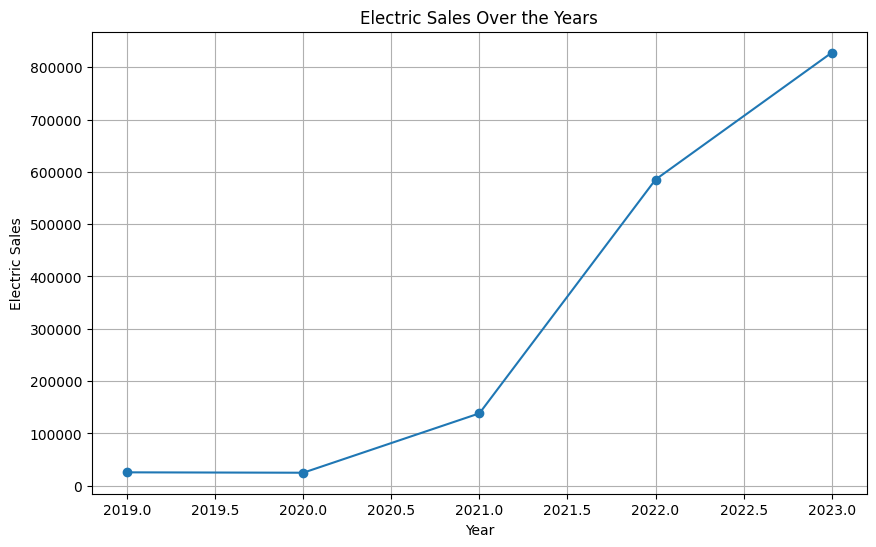

In [ ]:
import matplotlib.pyplot as plt

# Remove commas from numeric columns and convert to integers
df['electricbov'] = df['electricbov'].replace(',', '', regex=True).astype(int)
df['petrol'] = df['petrol'].replace(',', '', regex=True).astype(int)
df['total'] = df['total'].replace(',', '', regex=True).astype(int)

# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the Electric  sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['electricbov'], marker='o', linestyle='-')
plt.title('Electric Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Electric Sales')
plt.grid(True)
plt.show()

#You can clearly see the electric vehicle sales is keep on increasing

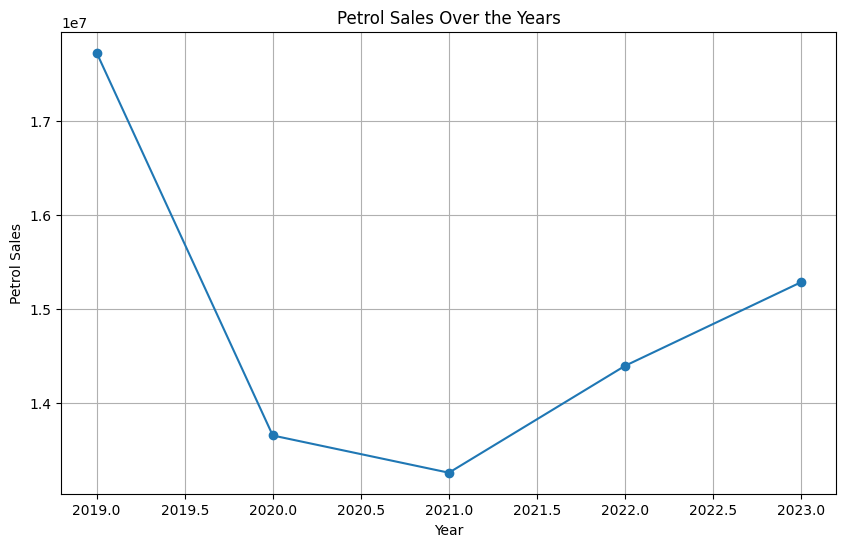

In [ ]:
# Remove commas from numeric columns and convert to integers
df['electricbov'] = df['electricbov'].replace(',', '', regex=True).astype(int)
df['petrol'] = df['petrol'].replace(',', '', regex=True).astype(int)
df['total'] = df['total'].replace(',', '', regex=True).astype(int)

# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the Electric  sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['petrol'], marker='o', linestyle='-')
plt.title('Petrol Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Petrol Sales')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,sn0,month,year,maker,electricbov,petrol,total
0,1,JAN,2019,ACTION CONSTRUCTION EQUIPMENT LTD.,0,1,1
1,2,JAN,2019,ADISHWAR AUTO RIDE INDIA PVT LTD,0,8,8
2,3,JAN,2019,ATHER ENERGY PVT LTD,20,0,20
3,4,JAN,2019,ATUL AUTO LTD,0,1,1
4,5,JAN,2019,AVAN MOTORS PVT LTD,14,0,14


In [ ]:
df.isnull().sum()


sn0            0
month          0
year           0
maker          0
electricbov    0
petrol         0
total          0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming df is your dataframe
# Convert month names to month numbers
month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
df['month'] = df['month'].map(month_map)



# Convert month column to integer
df['month'] = df['month'].astype(int)

# Combine month and year into a date string and convert to datetime
df['DATE'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-01')

# Convert relevant columns to numeric types
df['electricbov'] = pd.to_numeric(df['electricbov'], errors='coerce')
df['petrol'] = pd.to_numeric(df['petrol'], errors='coerce')
df['total'] = pd.to_numeric(df['total'], errors='coerce')

# Fill NaN values with zero
df['electricbov'].fillna(0, inplace=True)
df['petrol'].fillna(0, inplace=True)
df['total'].fillna(0, inplace=True)

# Extract month and year from the DATE
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year

# Drop the DATE column
df.drop(columns=['DATE'], inplace=True)

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Function to train model and make predictions
def train_and_predict(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        # Check the number of data points available for the maker
        if len(maker_df) < 2:
            print(f"Not enough data for maker {maker} for {target_column} predictions (available data points: {len(maker_df)})")
            continue

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if y.isna().sum() > 0:
            print(f"Data contains NaN values for maker {maker} in {target_column}")
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions for 2024
        future_dates = pd.DataFrame({'year': [2024] * 12, 'month': range(1, 13)})
        future_predictions = model.predict(future_dates)

        for i, prediction in enumerate(future_predictions):
            predictions.append({'year': 2024, 'month': future_dates['month'][i], 'maker': maker, target_column: prediction})

    return pd.DataFrame(predictions)

# Check the distribution of data points per maker and year
print(df.groupby(['maker', 'year']).size())

# Predict electric sales for 2024
electric_predictions = train_and_predict(electric_sales, 'electricbov')
print("Electric Predictions:")
print(electric_predictions.head())

# Predict petrol sales for 2024
petrol_predictions = train_and_predict(petrol_sales, 'petrol')
print("Petrol Predictions:")
print(petrol_predictions.head())

# Check if predictions DataFrames are empty
if electric_predictions.empty or petrol_predictions.empty:
    print("One of the predictions DataFrames is empty. Check the data and try again.")
else:
    # Merge the predictions to have a complete dataframe similar to the input
    predictions_2024 = pd.merge(electric_predictions, petrol_predictions, on=['year', 'month', 'maker'], how='outer')

    # Sort the predictions by maker and month
    predictions_2024 = predictions_2024.sort_values(by=['maker', 'month']).reset_index(drop=True)

    # Fill NaN values with 0 (if any)
    predictions_2024.fillna(0, inplace=True)

    # Add a TOTAL column as the sum of electric and petrol sales
    predictions_2024['total'] = predictions_2024['electricbov'] + predictions_2024['petrol']

    # Display predictions
    print(predictions_2024)


maker                                            year
A.K.AUTO ELECTRICAL                              2019     1
AADHYA ENTERPRISES                               2019     1
AADITYA EMOTORS INDIA PVT LTD                    2023     1
ABZO MOTORS PVT LTD                              2023     5
ACCRETION POWER AUTOS                            2019     2
                                                         ..
ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH)        2023    11
ZHEJIANG MORNI (IMPORTER: ADISHWAR AUTO)         2022     2
                                                 2023     9
ZHEJIANG QIANJIANG (IMPORTER: ADISHWAR AUTO)     2023    12
ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)  2023    12
Length: 685, dtype: int64
Not enough data for maker BENTLEY MOTORS LTD for electricbov predictions (available data points: 1)
Not enough data for maker CLASSIC (INDIA) MOTORS for electricbov predictions (available data points: 1)
Not enough data for maker G & G AUTOMOTIVE for electricb

In [ ]:
predictions_2024.head()

,year,month,maker,electricbov,petrol,total
0,2024,1,ABZO MOTORS PVT LTD,2.13,0.0,2.13
1,2024,2,ABZO MOTORS PVT LTD,2.13,0.0,2.13
2,2024,3,ABZO MOTORS PVT LTD,2.13,0.0,2.13
3,2024,4,ABZO MOTORS PVT LTD,2.13,0.0,2.13
4,2024,5,ABZO MOTORS PVT LTD,2.13,0.0,2.13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sn0          4468 non-null   int64 
 1   month        4468 non-null   int32 
 2   year         4468 non-null   int32 
 3   maker        4468 non-null   object
 4   electricbov  4468 non-null   int64 
 5   petrol       4468 non-null   int64 
 6   total        4468 non-null   int64 
dtypes: int32(2), int64(4), object(1)
memory usage: 209.6+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Function to train model and make predictions
def train_and_predict(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions for 2024
        future_dates = pd.DataFrame({'year': [2024] * 12, 'month': range(1, 13)})
        future_predictions = model.predict(future_dates)

        for i, prediction in enumerate(future_predictions):
            # Cast the prediction to integer
            predictions.append({'year': 2024, 'month': future_dates['month'][i], 'maker': maker, target_column: int(prediction)})

    return pd.DataFrame(predictions)

# Predict electric sales for 2024
electric_predictions = train_and_predict(electric_sales, 'electricbov')

# Predict petrol sales for 2024
petrol_predictions = train_and_predict(petrol_sales, 'petrol')

# Merge the predictions to have a complete dataframe similar to the input
predictions_2024RFG = pd.merge(electric_predictions, petrol_predictions, on=['year', 'month', 'maker'], how='outer')

# Sort the predictions by maker and month
predictions_2024RFG = predictions_2024RFG.sort_values(by=['maker', 'month']).reset_index(drop=True)

# Fill NaN values with 0 (if any)
predictions_2024RFG.fillna(0, inplace=True)

# Add a TOTAL column as the sum of electric and petrol sales
predictions_2024RFG['total'] = predictions_2024RFG['electricbov'] + predictions_2024RFG['petrol']

# Convert electricbov, petrol, and total columns to integer type
predictions_2024RFG[['electricbov', 'petrol', 'total']] = predictions_2024RFG[['electricbov', 'petrol', 'total']].astype(int)

# Display predictions
print(predictions_2024RFG)


      year  month                                            maker  \
0     2024      1                              ABZO MOTORS PVT LTD   
1     2024      2                              ABZO MOTORS PVT LTD   
2     2024      3                              ABZO MOTORS PVT LTD   
3     2024      4                              ABZO MOTORS PVT LTD   
4     2024      5                              ABZO MOTORS PVT LTD   
...    ...    ...                                              ...   
3031  2024      8  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3032  2024      9  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3033  2024     10  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3034  2024     11  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3035  2024     12  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   

      electricbov  petrol  total  
0               2       0      2  
1               2       0      2  
2               2       0      2  
3               2  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Initialize lists to store predictions and true values
all_predictions_rf = []
all_true_values_rf = []

# Function to train model and make predictions using RandomForestRegressor
def train_and_predict_rf(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []
    true_values = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        predictions.extend(y_pred)
        true_values.extend(y_test)

    return predictions, true_values

# Call the function for electric sales using RandomForestRegressor
electric_predictions_rf, electric_true_values_rf = train_and_predict_rf(electric_sales, 'electricbov')

# Call the function for petrol sales using RandomForestRegressor
petrol_predictions_rf, petrol_true_values_rf = train_and_predict_rf(petrol_sales, 'petrol')

# Combine predictions and true values for both electric and petrol sales using RandomForestRegressor
all_predictions_rf.extend(electric_predictions_rf)
all_predictions_rf.extend(petrol_predictions_rf)
all_true_values_rf.extend(electric_true_values_rf)
all_true_values_rf.extend(petrol_true_values_rf)

# Calculate the overall model accuracy for RandomForestRegressor using R^2 score
overall_r2_rf = r2_score(all_true_values_rf, all_predictions_rf)

print("Overall model accuracy for RandomForestRegressor (R-squared Score):", overall_r2_rf)


Overall model accuracy for RandomForestRegressor (R-squared Score): 0.9752133734517556


# Doing the same with Support Vector Meachine model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Function to train model and make predictions
def train_and_predict_svm(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the SVM model
        model = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression
        model.fit(X_train, y_train)

        # Make predictions for 2024
        future_dates = pd.DataFrame({'year': [2024] * 12, 'month': range(1, 13)})
        future_predictions = model.predict(future_dates)

        for i, prediction in enumerate(future_predictions):
            predictions.append({'year': 2024, 'month': future_dates['month'][i], 'maker': maker, target_column: prediction})

    return pd.DataFrame(predictions)

# Predict electric sales for 2024 using SVM
electric_predictions_svm = train_and_predict_svm(electric_sales, 'electricbov')

# Predict petrol sales for 2024 using SVM
petrol_predictions_svm = train_and_predict_svm(petrol_sales, 'petrol')

# Merge the predictions to have a complete dataframe similar to the input
predictions_2024_svm = pd.merge(electric_predictions_svm, petrol_predictions_svm, on=['year', 'month', 'maker'], how='outer')

# Sort the predictions by maker and month
predictions_2024_svm = predictions_2024_svm.sort_values(by=['maker', 'month']).reset_index(drop=True)

# Fill NaN values with 0 (if any)
predictions_2024_svm.fillna(0, inplace=True)

# Add a TOTAL column as the sum of electric and petrol sales
predictions_2024_svm['total'] = predictions_2024_svm['electricbov'] + predictions_2024_svm['petrol']

# Display predictions
print(predictions_2024_svm)


      year  month                                            maker  \
0     2024      1                              ABZO MOTORS PVT LTD   
1     2024      2                              ABZO MOTORS PVT LTD   
2     2024      3                              ABZO MOTORS PVT LTD   
3     2024      4                              ABZO MOTORS PVT LTD   
4     2024      5                              ABZO MOTORS PVT LTD   
...    ...    ...                                              ...   
3031  2024      8  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3032  2024      9  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3033  2024     10  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3034  2024     11  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3035  2024     12  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   

      electricbov  petrol     total  
0        1.499972     0.0  1.499972  
1        1.499976     0.0  1.499976  
2        1.499980     0.0  1.499980  
3      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Initialize lists to store predictions and true values
all_predictions_svm = []
all_true_values_svm = []

# Function to train model and make predictions
def train_and_predict_svm(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []
    true_values = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the SVM model
        model = SVR(kernel='rbf')  # RBF kernel is commonly used for SVM regression
        model.fit(X_train, y_train)

        # Make predictions
        predictions.extend(model.predict(X_test))
        true_values.extend(y_test)

    return predictions, true_values

# Call the function for electric sales using SVM
electric_predictions_svm, electric_true_values_svm = train_and_predict_svm(electric_sales, 'electricbov')

# Call the function for petrol sales using SVM
petrol_predictions_svm, petrol_true_values_svm = train_and_predict_svm(petrol_sales, 'petrol')

# Combine predictions and true values for both electric and petrol sales using SVM
all_predictions_svm.extend(electric_predictions_svm)
all_predictions_svm.extend(petrol_predictions_svm)
all_true_values_svm.extend(electric_true_values_svm)
all_true_values_svm.extend(petrol_true_values_svm)

# Calculate the overall model accuracy for SVM using R^2 score
model_accuracy_svm = r2_score(all_true_values_svm, all_predictions_svm)

print("Overall model accuracy for SVM:", model_accuracy_svm)


Overall model accuracy for SVM: 0.9511894682652569


 # Now we do the same using GradientBoostingRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Function to train model and make predictions
def train_and_predict(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions for 2024
        future_dates = pd.DataFrame({'year': [2024] * 12, 'month': range(1, 13)})
        future_predictions = model.predict(future_dates)

        for i, prediction in enumerate(future_predictions):
            predictions.append({'year': 2024, 'month': future_dates['month'][i], 'maker': maker, target_column: prediction})

    return pd.DataFrame(predictions)

# Predict electric sales for 2024
electric_predictions = train_and_predict(electric_sales, 'electricbov')

# Predict petrol sales for 2024
petrol_predictions = train_and_predict(petrol_sales, 'petrol')

# Merge the predictions to have a complete dataframe similar to the input
predictions_2024GBR = pd.merge(electric_predictions, petrol_predictions, on=['year', 'month', 'maker'], how='outer')

# Sort the predictions by maker and month
predictions_2024GBR = predictions_2024GBR.sort_values(by=['maker', 'month']).reset_index(drop=True)

# Fill NaN values with 0 (if any)
predictions_2024GBR.fillna(0, inplace=True)

# Convert predicted sales columns to integers
predictions_2024GBR['electricbov'] = predictions_2024GBR['electricbov'].astype(int)
predictions_2024GBR['petrol'] = predictions_2024GBR['petrol'].astype(int)

# Add a TOTAL column as the sum of electric and petrol sales
predictions_2024GBR['total'] = predictions_2024GBR['electricbov'] + predictions_2024['petrol']

# Display predictions
print(predictions_2024GBR)


      year  month                                            maker  \
0     2024      1                              ABZO MOTORS PVT LTD   
1     2024      2                              ABZO MOTORS PVT LTD   
2     2024      3                              ABZO MOTORS PVT LTD   
3     2024      4                              ABZO MOTORS PVT LTD   
4     2024      5                              ABZO MOTORS PVT LTD   
...    ...    ...                                              ...   
3031  2024      8  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3032  2024      9  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3033  2024     10  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3034  2024     11  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   
3035  2024     12  ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)   

      electricbov  petrol  total  
0               1       0    1.0  
1               1       0    1.0  
2               1       0    1.0  
3               1  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your dataframe

# Prepare the data for modeling for electric and petrol sales separately
electric_sales = df[['year', 'month', 'maker', 'electricbov']]
petrol_sales = df[['year', 'month', 'maker', 'petrol']]

# Initialize lists to store predictions and true values
all_predictions = []
all_true_values = []

# Function to train model and make predictions
def train_and_predict(sales_df, target_column):
    makers = sales_df['maker'].unique()
    predictions = []
    true_values = []

    for maker in makers:
        maker_df = sales_df[sales_df['maker'] == maker]

        X = maker_df[['year', 'month']]
        y = maker_df[target_column]

        # Check if there are enough data points for training
        if len(y) < 2:
            continue

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the model
        model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        predictions.extend(model.predict(X_test))
        true_values.extend(y_test)

    return predictions, true_values

# Call the function for electric sales
electric_predictions, electric_true_values = train_and_predict(electric_sales, 'electricbov')

# Call the function for petrol sales
petrol_predictions, petrol_true_values = train_and_predict(petrol_sales, 'petrol')

# Combine predictions and true values for both electric and petrol sales
all_predictions.extend(electric_predictions)
all_predictions.extend(petrol_predictions)
all_true_values.extend(electric_true_values)
all_true_values.extend(petrol_true_values)

# Calculate the overall model accuracy
model_accuracy = r2_score(all_true_values, all_predictions)

print("Overall model accuracy GradientBoostingRegressor:", model_accuracy)


Overall model accuracy GradientBoostingRegressor: 0.9694540265379704


#As we can see clearly that the accuracy of RandomForestRegressor model is high so we append with the old data and create a new data|

In [ ]:
# Append predictions_2024 to the original dataframe df
df = pd.concat([df, predictions_2024RFG], ignore_index=True)

# Display the updated dataframe
df


,sn0,month,year,maker,electricbov,petrol,total
0,1.0,1,2019,ACTION CONSTRUCTION EQUIPMENT LTD.,0,1,1
1,2.0,1,2019,ADISHWAR AUTO RIDE INDIA PVT LTD,0,8,8
2,3.0,1,2019,ATHER ENERGY PVT LTD,20,0,20
3,4.0,1,2019,ATUL AUTO LTD,0,1,1
4,5.0,1,2019,AVAN MOTORS PVT LTD,14,0,14
...,...,...,...,...,...,...,...
7499,NaN,8,2024,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),3,0,3
7500,NaN,9,2024,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),3,0,3
7501,NaN,10,2024,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),3,0,3
7502,NaN,11,2024,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),2,0,2


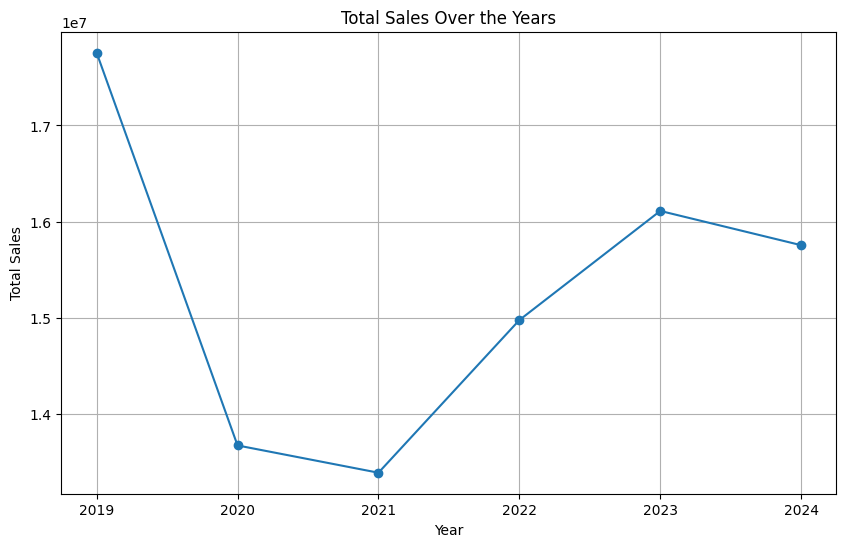

In [ ]:
# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the total sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['total'], marker='o', linestyle='-')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

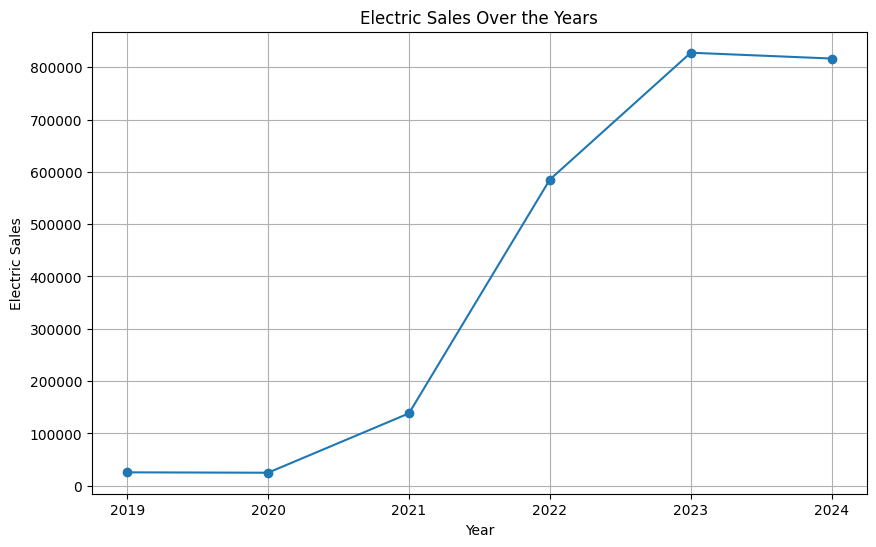

In [ ]:
# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the Electric  sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['electricbov'], marker='o', linestyle='-')
plt.title('Electric Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Electric Sales')
plt.grid(True)
plt.show()

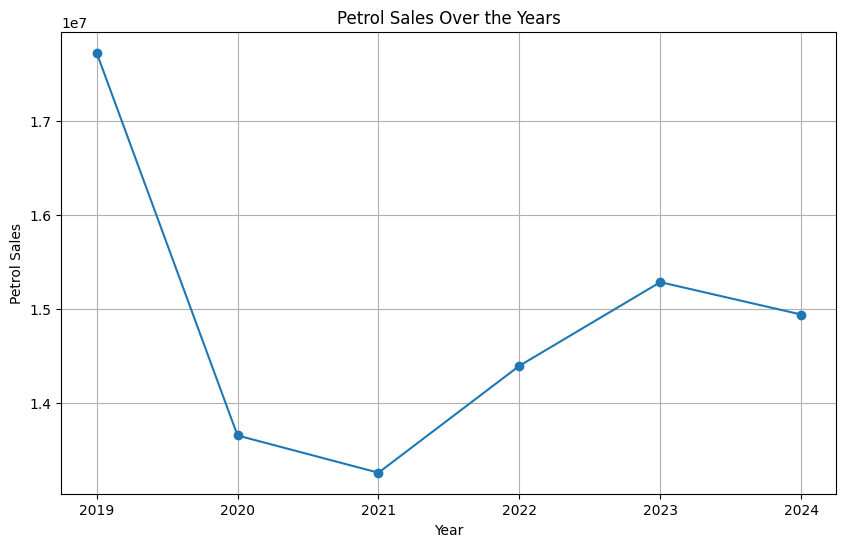

In [ ]:
# Group by year and sum the sales
yearly_sales = df.groupby('year').sum()

# Plot the Electric  sales over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['petrol'], marker='o', linestyle='-')
plt.title('Petrol Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Petrol Sales')
plt.grid(True)
plt.show()

#AS we can see from the model that sales in 2024 will be less compared to the previous year

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Designer (62).png to Designer (62) (1).png
